In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import matplotlib.animation as animation

In [3]:
def extraer_datos(nombre_h5):

    with h5py.File(nombre_h5, flag ='r') as hdf:
        base_items = list(hdf.items())
        print(base_items, '\n')
        tasks = hdf.get('tasks')
        tasks_items = list(tasks.items())
        print(tasks_items)

        T = np.array(tasks.get('T'))
        print(T.shape)

        ρ = np.array(tasks.get('ρ'))
        print(ρ.shape)
        
    return T, ρ

In [4]:
def animar_dedalus(xm, ym, S, CMAP):
    fig, axis = plt.subplots(figsize=(7,7))
    p = axis.pcolormesh(xm, ym, S[0,:,:], cmap=CMAP)

    def init():
                print('update init')
                p.set_array(np.ravel(S[0,:-1,:-1]))
                return p

    def update(frame):
        p.set_array(np.ravel(S[frame, :-1, :-1]))
        return p

    anim = animation.FuncAnimation(fig, update, frames= [i for i in range(1,len(S))], init_func=init,  blit = False)
    plt.show()
    return anim

In [5]:
T1, ρ1 = extraer_datos('prueba_larga/prueba_larga_s1/prueba_larga_s1_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (8 members)>)] 

[('p', <HDF5 dataset "p": shape (100, 256, 256), type "<f8">), ('u', <HDF5 dataset "u": shape (100, 256, 256), type "<f8">), ('v', <HDF5 dataset "v": shape (100, 256, 256), type "<f8">), ('T', <HDF5 dataset "T": shape (100, 256, 256), type "<f8">), ('uy', <HDF5 dataset "uy": shape (100, 256, 256), type "<f8">), ('ρ', <HDF5 dataset "ρ": shape (100, 256, 256), type "<f8">), ('vy', <HDF5 dataset "vy": shape (100, 256, 256), type "<f8">), ('Ty', <HDF5 dataset "Ty": shape (100, 256, 256), type "<f8">)]
(100, 256, 256)
(100, 256, 256)


In [6]:
Lx, Ly = (0.2, 0.35)
dx, dy = (Lx/256, Ly/256)

In [7]:
xm, ym = np.mgrid[slice(0 ,Lx, dx), slice(0, Ly, dy)]

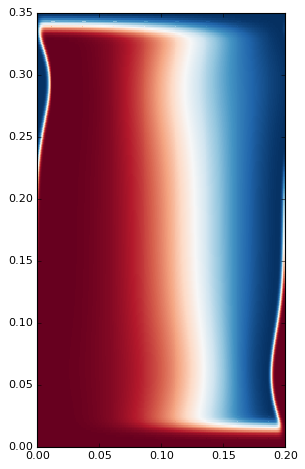

In [25]:
fig, axis = plt.subplots(figsize=(4,7))
p = axis.pcolormesh(xm, ym, ρ1[40], cmap='RdBu_r');

In [40]:
rho1 = ρ1

update init


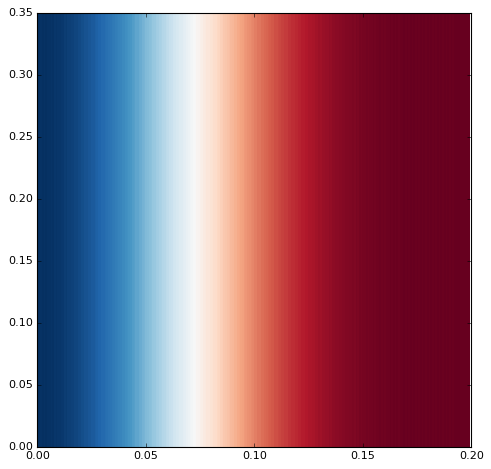

In [44]:
anima1 = animar_dedalus(xm, ym, rho1, 'RdBu_r')

In [45]:
mywriter = animation.FFMpegWriter()
anima1.save('rho1_p_larga.mp4',writer=mywriter, fps=30)

update init


In [18]:
T4, ρ4 = extraer_datos('prueba_larga/prueba_larga_s4/prueba_larga_s4_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (8 members)>)] 

[('p', <HDF5 dataset "p": shape (100, 256, 256), type "<f8">), ('u', <HDF5 dataset "u": shape (100, 256, 256), type "<f8">), ('v', <HDF5 dataset "v": shape (100, 256, 256), type "<f8">), ('T', <HDF5 dataset "T": shape (100, 256, 256), type "<f8">), ('uy', <HDF5 dataset "uy": shape (100, 256, 256), type "<f8">), ('ρ', <HDF5 dataset "ρ": shape (100, 256, 256), type "<f8">), ('vy', <HDF5 dataset "vy": shape (100, 256, 256), type "<f8">), ('Ty', <HDF5 dataset "Ty": shape (100, 256, 256), type "<f8">)]
(100, 256, 256)
(100, 256, 256)


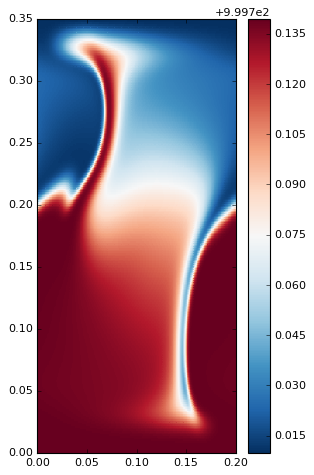

In [22]:
fig, axis = plt.subplots(figsize=(4,7))
p = axis.pcolormesh(xm, ym, ρ4[0], cmap='RdBu_r');
plt.colorbar(p)